In [4]:
%matplotlib inline

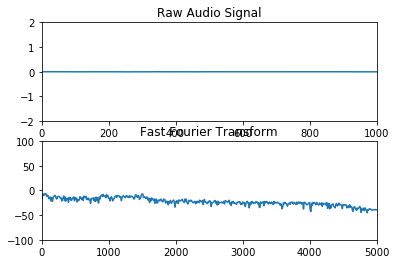

In [5]:
try:
    import pyaudio
    import numpy as np
    import pylab
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    import time
    import sys
except:
    print "Something didn't import"

p = pyaudio.PyAudio()
i=0
f,ax = plt.subplots(2)
plt.ion()

# Prepare the Plotting Environment with random starting values
x = np.arange(2000)
y = np.random.randn(2000)

# Plot 0 is for raw audio data
li, = ax[0].plot(x, y)
ax[0].set_xlim(0,1000)
ax[0].set_ylim(-2,2)
ax[0].set_title("Raw Audio Signal")
# Plot 1 is for the FFT of the audio
li2, = ax[1].plot(x, y)
ax[1].set_xlim(0,5000)
ax[1].set_ylim(-100,100)
ax[1].set_title("Fast Fourier Transform")
# Show the plot, but without blocking updates
plt.pause(0.01)


In [6]:
def callback(in_data, frame_count, time_info, flag):
    # get and convert the data to float
    audio_data = np.fromstring(in_data, dtype=np.float32)
    
    # Fast Fourier Transform, 10*log10(abs) is to scale it to dB
    # and make sure it's not imaginary
    dfft = 10.*np.log10(abs(np.fft.rfft(audio_data)))
    
    # Force the new data into the plot, but without redrawing axes.
    # If uses plt.draw(), axes are re-drawn every time
    li.set_xdata(np.arange(len(audio_data)))
    li.set_ydata(audio_data)
    li2.set_xdata(np.arange(len(dfft))*10.)
    li2.set_ydata(dfft)
    
    # Show the updated plot, but without blocking
    plt.pause(0.01)
    time.sleep(0.01)
    return (audio_data, pyaudio.paContinue)

# This initializes the connection to the microphone, using pyAudio
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=44100,
                output=False,
                input=True,
                stream_callback=callback)

# Open the connection and start streaming the data
stream.start_stream()
print "\n+---------------------------------+"
print "| Press Ctrl+C to Break Recording |"
print "+---------------------------------+\n"

# Loop so program doesn't end while the stream callback's 
# itself for new data
while stream.is_active():
    try:
        i=1
    except KeyboardInterrupt:
        break

# Close up shop (currently not used because KeyboardInterrupt 
# is the only way to close)
stream.stop_stream()
stream.close()

p.terminate()


+---------------------------------+
| Press Ctrl+C to Break Recording |
+---------------------------------+



KeyboardInterrupt: 